In [39]:
import jax
from jax import config
config.update("jax_enable_x64", True)
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import sax
import pandas as pd
import simphony
from simphony.quantum import QuantumTimeElement
from simphony.libraries import siepic, ideal
from simphony.utils import smooth_rectangular_pulse, dict_to_matrix, gaussian_pulse
from simphony.time_domain.baseband_vector_fitting import BasebandModel
from scipy import signal
from scipy.signal import  StateSpace, dlsim


In [22]:
def dlsim_complex(system, u, t=None, x0=None):
    out_samples = len(u)
    stoptime = (out_samples - 1) * system.dt

    xout = np.zeros((out_samples, system.A.shape[0]), dtype=complex)
    yout = np.zeros((out_samples, system.C.shape[0]), dtype=complex)
    tout = np.linspace(0.0, stoptime, num=out_samples)

    xout[0, :] = np.zeros((system.A.shape[1],), dtype=complex)

    u_dt = u

    # Simulate the system
    for i in range(0, out_samples - 1):
        xout[i+1, :] = (np.dot(system.A, xout[i, :]) +
                        np.dot(system.B, u_dt[i, :]))
        yout[i, :] = (np.dot(system.C, xout[i, :]) +
                    np.dot(system.D, u_dt[i, :]))

    # Last point
    yout[out_samples-1, :] = (np.dot(system.C, xout[out_samples-1, :]) +
                            np.dot(system.D, u_dt[out_samples-1, :]))

    return tout, yout, xout

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


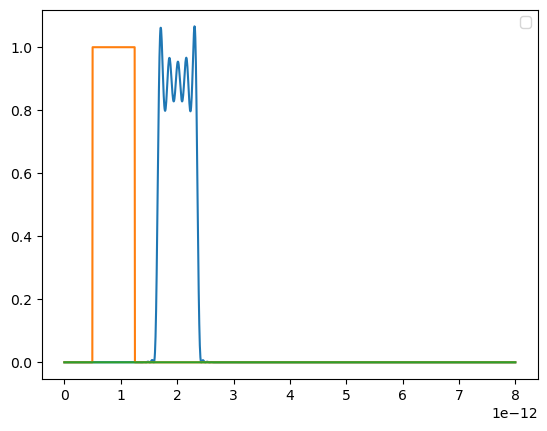

In [49]:
netlist = {
    "instances": {
        "wg": "waveguide",
    },
    "connections": {},
    "ports": {
        "o0": "wg,o0",
        "o1": "wg,o1",
    }
}
circuit, info = sax.circuit(
    netlist=netlist,
    models={
        "waveguide": ideal.waveguide,
    }
)

wvl_microns = np.linspace(1.51, 1.59, 200)
center_wvl = 1.55

ckt = circuit(wl=wvl_microns, wg={"length": 100, "loss": 50})
s_params = np.asarray(dict_to_matrix(ckt))
plt.plot(wvl_microns, np.abs(s_params[:, 0, 1])**2)
T = 1e-12

baseband_model  = BasebandModel(wvl_microns, center_wvl, s_params, 50)
response = baseband_model.compute_response(1, 0)
plt.plot(wvl_microns, np.abs(response)**2)
y = baseband_model.generate_sys_discrete()
#s_system = signal.dlti(y.A, y.B, y.C, y.D, dt = y.dt)
s_system = StateSpace(y.A, y.B, y.C, y.D, dt = y.dt)
# t = np.linspace(0.0, T, int(abs(T/y.dt)))
T = 8e-12
t = np.arange(0.0, T, y.dt)
u1 = np.zeros_like(t, dtype=complex)
u1[100:250] = 1
u2 = np.zeros_like(t, dtype=complex)
u = np.vstack([u1,u2]).T

input_signal = np.zeros((100, 2), dtype=complex)

input_signal[:, 1] = 0.0 + 0.0*1j
# t_out,y_out,x_out = dlsim_complex(s_system, u) 
t_out,y_out,x_out = dlsim_complex(s_system, u) 
plt.clf()
plt.plot(t_out, np.abs(y_out[:, 1])**2)
plt.plot(t_out, np.abs(u)**2)
# plt.step(t_out, u, where='post', label='Input: Rectangular Pulse', color='g', alpha=0.6)
# plt.step(t_out, y_out, where='post', label='Output response', color='b')
# plt.title('Baseband Model Output Response to Rectangular Pulse Input')
# plt.xlabel('Time')
# plt.ylabel('E-field Amp')

# T = 1e-12
# baseband_model.compute_state_space_model()
# sys = StateSpace(baseband_model.A, baseband_model.B, baseband_model.C, baseband_model.D, dt = 1* 1/baseband_model.sampling_freq)

# t = np.linspace(0.0, T, int(abs(T/sys.dt)))
# T = 1e-12
# u1 = np.zeros_like(t)
# u1[100:200] = 1
# u2 = np.zeros_like(t)
# u = np.vstack([u1,u2]).T

# input_signal = np.zeros((100, 2), dtype=complex)

# input_signal[:, 1] = 0.0 + 0.0*1j
# t_out,y_out,x_out = signal.dlsim(sys, u) 
# plt.step(t_out, u, where='post', label='Input: Rectangular Pulse', color='g', alpha=0.6)
# plt.step(t_out, y_out, where='post', label='Output response', color='b')
# plt.title('Baseband Model Output Response to Rectangular Pulse Input')
# plt.xlabel('Time')
# plt.ylabel('E-field Amp')


plt.legend()
plt.show()



In [3]:
print(u.shape)
y.B.shape

(199, 2)


(100, 2)

In [30]:
y_out[:, 1]


array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000